#### Import necessary libraries

In [24]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy
import json
plt.rcParams["figure.figsize"] = (12,8)


### Subsection 2

!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

In [25]:
# Import Relevant Packages
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
from mnist.loader import MNIST

In [26]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [27]:
#images[0]

In [28]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


In [29]:
len(images)

10000

#### ===================================================

- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

### Make arrangements to reduce training data size
#### I train on 27% ie 16200 samples of the training data (instead of all 60000) due to computational lease

In [30]:
fraction_used=0.27
images_train,_, labels_train,__ = train_test_split(images_train, labels_train, \
                                     test_size=1-fraction_used,\
                                     random_state=0, \
                                     stratify=labels_train)


In [31]:
len(images_train)

16200

In [32]:
#SVModel=SVC(C=100)

In [33]:
import datetime

x = datetime.datetime.now()
print(x)

2021-12-05 02:49:43.060401


### Create a dictionary with all parameters

In [34]:
#SVModel.fit(images_train, labels_train)

In [35]:
#confusion_matrix([x for x in labels_train], SVModel.predict(images_train))

In [36]:
import datetime

x = datetime.datetime.now()
print(x)

2021-12-05 02:49:43.092124


### Calculate metrics for all

In [37]:
labels_train[0]

6

In [38]:
def plot_confusion_matrix(mat):
    num_cols=len(mat)
    df_cm = pd.DataFrame(mat,index=[i for i in range(0,num_cols)],
                      columns = [i for i in range(0,num_cols)])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

In [39]:
np.logspace(-3, 2, 6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [40]:
#plot_confusion_matrix(confusion_matrix([x for x in labels_train], SVModel.predict(images_train)))

In [41]:
model_list=[]
FILE_PATH="./store_data/"

## Linear kernel

In [42]:
kernel_name="linear"
params_dict={
    "C":np.logspace(-3, 2, 6)
}

In [ ]:
for curr_c_val in params_dict['C']:
    SVModel=SVC(kernel=kernel_name,C=curr_c_val)
    SVModel.fit(images_train, labels_train)
    model_summary={"kernel-type":kernel_name,"C":curr_c_val }
    train_arr=list(SVModel.predict(images_train))
    test_arr=list(SVModel.predict(images_test))
    model_summary['train-acc']=accuracy_score(labels_train, train_arr)
    model_summary['test-acc']=accuracy_score(labels_test, test_arr)
    model_summary['train-f1']=f1_score(labels_train, train_arr,average='macro')
    model_summary['test-f1']=f1_score(labels_test, test_arr,average='macro')
    model_list.append(deepcopy(model_summary))
    file_name=""
    for curr_key, curr_val in model_summary.items():
        if "test" in curr_key or "train" in curr_key:
            continue
        file_name+=curr_key+"_"+str(curr_val)+"_"
    model_summary['train-arr']=train_arr
    model_summary['test-arr']=test_arr
    with open(FILE_PATH+file_name+".json",'w') as fd:
        json.dump(model_summary,fd, indent=2,default=str)
    with open("models_list.json",'w') as fd:
        json.dump(model_list,fd, indent=2 )

### RBF KERNEL

In [43]:
kernel_name="rbf"
params_dict={
    "C":np.logspace(-2, 2, 2),
    "gamma":list(np.logspace(-1, 2, 2))+['auto','scale']
}

In [44]:
params_dict

{'C': array([1.e-02, 1.e+02]), 'gamma': [0.1, 100.0, 'auto', 'scale']}

In [ ]:
for curr_c_val in params_dict['C']:
    for curr_gamma_val in params_dict['gamma']:
        SVModel=SVC(kernel=kernel_name,C=curr_c_val, gamma=curr_gamma_val)
        SVModel.fit(images_train, labels_train)
        model_summary={"kernel-type":kernel_name,"C":curr_c_val,"gamma":curr_gamma_val }
        train_arr=list(SVModel.predict(images_train))
        test_arr=list(SVModel.predict(images_test))
        model_summary['train-acc']=accuracy_score(labels_train, train_arr)
        model_summary['test-acc']=accuracy_score(labels_test, test_arr)
        model_summary['train-f1']=f1_score(labels_train, train_arr,average='macro')
        model_summary['test-f1']=f1_score(labels_test, test_arr,average='macro')
        model_list.append(deepcopy(model_summary))
        file_name=""
        for curr_key, curr_val in model_summary.items():
            if "test" in curr_key or "train" in curr_key:
                continue
            file_name+=curr_key+"_"+str(curr_val)+"_"
        model_summary['train-arr']=train_arr
        model_summary['test-arr']=test_arr
        with open(FILE_PATH+file_name+".json",'w') as fd:
            json.dump(model_summary,fd, indent=2,default=str )
        with open("models_list.json",'w') as fd:
            json.dump(model_list,fd, indent=2 )

### Poly

In [45]:
kernel_name="poly"
params_dict={
    "C":np.logspace(-3, 2, 2),
    "gamma":list(np.logspace(-1, 2, 2)),
    'degree':[2,3]
}

In [46]:
kernel_name

'poly'

for curr_c_val in params_dict['C']:
    for curr_gamma_val in params_dict['gamma']:
        for curr_deg_val in params_dict['degree']:
            SVModel=SVC(kernel=kernel_name,C=curr_c_val, gamma=curr_gamma_val, degree=curr_deg_val)
            SVModel.fit(images_train, labels_train)
            model_summary={"kernel-type":kernel_name,"C":curr_c_val,"gamma":curr_gamma_val,"degree":curr_deg_val }
            train_arr=list(SVModel.predict(images_train))
            test_arr=list(SVModel.predict(images_test))
            model_summary['train-acc']=accuracy_score(labels_train, train_arr)
            model_summary['test-acc']=accuracy_score(labels_test, test_arr)
            model_summary['train-f1']=f1_score(labels_train, train_arr,average='macro')
            model_summary['test-f1']=f1_score(labels_test, test_arr,average='macro')
            model_list.append(deepcopy(model_summary))
            file_name=""
            for curr_key, curr_val in model_summary.items():
                if "test" in curr_key or "train" in curr_key:
                    continue
                file_name+=curr_key+"_"+str(curr_val)+"_"
            model_summary['train-arr']=train_arr
            model_summary['test-arr']=test_arr
            with open(FILE_PATH+file_name+".json",'w') as fd:
                json.dump(model_summary,fd, indent=2,default=str )
            with open("models_list.json",'w') as fd:
                json.dump(model_list,fd, indent=2 )

### LOADING THE SAVED RESULTS

In [47]:
import json
import pandas as pd
with open("./models_list.json",'r') as fd:
    df=json.load(fd)

In [48]:
df=pd.DataFrame(df)

In [49]:
df.sort_values(by='test-acc', ascending=False, inplace=True)

## SUMMARY OF THE SCORES (sorted based on training accuracy)
#### Intuition for the "C" parameter (also mentioned as slack variable in SVM_part_1 notebook)
C = how much to penalize samples not on the correct side of the boundary
The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 

#### Intuition for the "gamma" parameter 
For RBF and poly, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
Gamma represents the extent of curvature we want in a decision boundary.

##### Conclusions
* While RBF with high "C" seems to get the best result, it is evident that on average, irrespective of hyperparameters, the "poly" kernel performs the best. After that, the LINEAR kernel seems to perform the best on average and then RBF on average performs the worst. 
* Lower degree (2) variant of POLY peforms better than variant with degree=3
* with models with bost high and low C_vals performing nicely, seems that for this dataset, C_val does not have any mind-bending influence.
* for linear kernel, despite varying all sorts of parameters, result comes out to be the same. This might be because even a C_val of as low as 1e-3 is not low enough to justify more mis-classifications than is already the case. Since it is unlikely that a linear boundary was possible, it is highly likely that the global minimum occurred with some fixed number of samples outside the margin. 

In [50]:
1/784

0.0012755102040816326

In [51]:
df.loc[df.gamma == 'auto', 'gamma'] = 1/784

In [52]:
df

,kernel-type,C,train-acc,test-acc,train-f1,test-f1,gamma,degree
16,rbf,1.000000e+02,1.000000,0.9741,1.000000,0.973854,scale,NaN
23,poly,1.000000e+02,1.000000,0.9699,1.000000,0.969577,100.0,2.0
21,poly,1.000000e+02,1.000000,0.9699,1.000000,0.969577,0.1,2.0
19,poly,1.000000e-03,1.000000,0.9699,1.000000,0.969577,100.0,2.0
17,poly,1.000000e-03,1.000000,0.9699,1.000000,0.969577,0.1,2.0
24,poly,1.000000e+02,1.000000,0.9666,1.000000,0.966300,100.0,3.0
22,poly,1.000000e+02,1.000000,0.9666,1.000000,0.966300,0.1,3.0
20,poly,1.000000e-03,1.000000,0.9666,1.000000,0.966300,100.0,3.0
18,poly,1.000000e-03,1.000000,0.9666,1.000000,0.966300,0.1,3.0
5,linear,1.000000e-07,0.935370,0.9322,0.934600,0.931245,NaN,NaN


# Now, I will show the confusion matrices for some important models from above. I choose one from each linear, poly and rbf for analysis.

### KERNEL = rbf, C=100, GAMMA=scale

In [53]:
file_name="kernel-type_rbf_C_100.0_gamma_scale_.json"
with open(f"./store_data/{file_name}",'r') as fd:
    check_df=json.load(fd)

In [54]:
print("test-f1 score is ", check_df['test-f1'])
print("test-acc score is ", check_df['test-acc'])

test-f1 score is  0.9738538745732329
test-acc score is  0.9741


In [59]:
y_pred=[int(x) for x in check_df['test-arr']]

In [61]:
conf_mat=confusion_matrix([x for x in labels_test], y_pred)

#### Inferences from confusion matrix
We notice that some numbers have been particularly mis-classified due to looking visually similar:
* 9 confused with 4 and vice vera
* 2 confused with 7
* 9 confused with 7

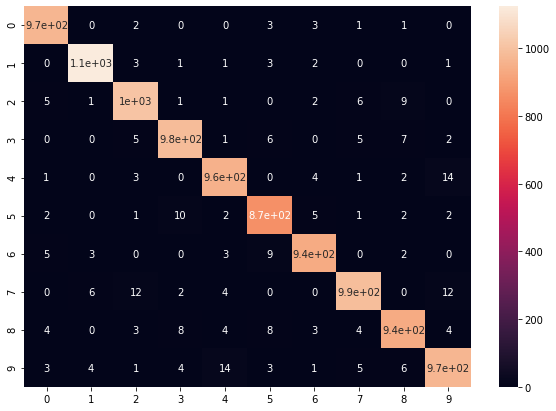

In [62]:
plot_confusion_matrix(conf_mat)

## ==================

### KERNEL = linear

In [64]:
file_name="kernel-type_linear_C_0.001_.json"
with open(f"./store_data/{file_name}",'r') as fd:
    check_df=json.load(fd)

In [65]:
print("test-f1 score is ", check_df['test-f1'])
print("test-acc score is ", check_df['test-acc'])

test-f1 score is  0.9074667394767924
test-acc score is  0.9091


In [66]:
y_pred=[int(x) for x in check_df['test-arr']]

In [67]:
conf_mat=confusion_matrix([x for x in labels_test], y_pred)

#### Inferences from confusion matrix
Here , we see some high misses.
* 4 confused with 9 and vice versa
* 3, 5 and 8 confused among each other
* 7 confused with 9

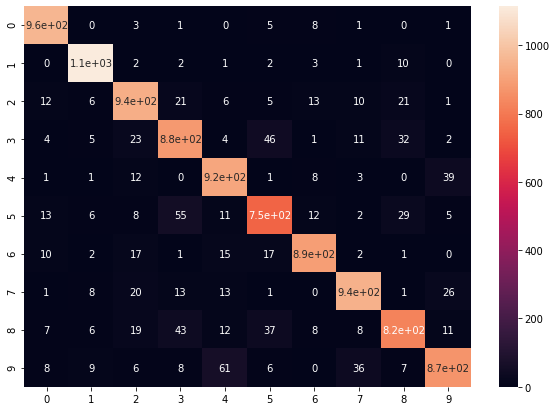

In [68]:
plot_confusion_matrix(conf_mat)

## ============================

### KERNEL = POLY, C=100, gamma=100, degree=2

In [70]:
file_name="kernel-type_poly_C_100.0_gamma_100.0_degree_2_.json"
with open(f"./store_data/{file_name}",'r') as fd:
    check_df=json.load(fd)

In [71]:
print("test-f1 score is ", check_df['test-f1'])
print("test-acc score is ", check_df['test-acc'])

test-f1 score is  0.9695768310396156
test-acc score is  0.9699


In [72]:
y_pred=[int(x) for x in check_df['test-arr']]

In [73]:
conf_mat=confusion_matrix([x for x in labels_test], y_pred)

#### Inferences from confusion matrix
Here , we see some high misses.
* Again, we see 4,7 and 9 getting missed by the model
* also, 3 and 5 also getting mixed up

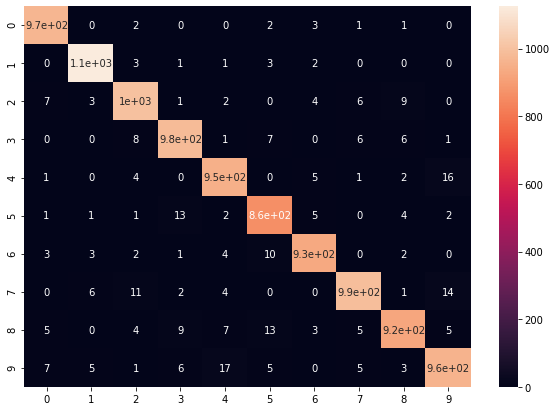

In [74]:
plot_confusion_matrix(conf_mat)